# Inteligencia de Negocios: Laboratorio 1
## Integrantes: Grupo 17

* Mariana Díaz Arenas - [m.diaza2](mailto:m.diaza2@uniandes.edu.co) 
* Esteban Gonzales Ruales - [e.gonzalez5](mailto:e.gonzalez5@uniandes.edu.co) 
* Juan Diego Yepes - [j.yepes](mailto:j.yepes@uniandes.edu.co) 


En el siguiente cuaderno de Jupyter implementamos la solución al siguiente laboratorio propuesto: [link](https://gitlab.virtual.uniandes.edu.co/ISIS3301/laboratorios/blob/master/202310/Lab%201%20-%20Clustering/Laboratorio1_enunciado.md)

# 1. Entendimiento de los datos

In [1]:
# Importación de librerías y creación del dataFrame

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

df_roads = pd.read_csv("data/BiciAlpes.csv", index_col=False, encoding="latin1", sep=";")
df_roads = df_roads.iloc[:, :-1]

# Imprime el tamaño del dataframe
df_roads.shape

(5338, 14)

In [3]:
# Verificación de que se cargó correctamente
df_roads

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,Tarde,1,Día laboral,6,20.0,1,1,2,1,bike,1,9,1,3
5334,Noche,2,Día laboral,6,30.0,1,1,1,2,bike,2,0,1,2
5335,Tarde,1,Día laboral,6,30.0,4,5,2,1,bike,2,3,1,2
5336,Noche,1,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3


In [4]:
# Completitud
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

In [5]:
# Unicidad
df_roads.loc[df_roads.duplicated(subset = df_roads.columns[1:], keep = False)].sort_values(by = "Time")

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
87,Madrugada,1,Día laboral,6,30.0,4,1,1,1,bike,1,0,1,3
36,Madrugada,1,NaN,6,30.0,4,1,1,1,bike,1,0,1,3
189,Madrugada,1,Fin de semana,6,30.0,4,1,1,1,bike,1,3,1,3
514,Madrugada,1,Día laboral,6,30.0,1,1,1,1,bike,1,9,1,3
3412,Mañana,1,Día laboral,6,30.0,1,1,1,2,bike,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
2638,Tarde,2,Día laboral,6,30.0,4,1,1,1,bike,1,0,1,2
1312,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,2,3,1,3
1291,Tarde,1,Día laboral,6,30.0,1,1,2,1,bike,1,3,1,2


In [6]:
# Número de resgistros duplicados
# Tiene sentido tener todos estos valores repetidos? -> si porque podemos tener varios registros de la misma ruta pero en diferentes fechas
print('Total de registros repetidos:', df_roads.loc[df_roads.duplicated(subset = df_roads.columns, keep = False)].shape[0])

Total de registros repetidos: 3834


In [7]:
# Consistencia
#Revisar todos los features
df_roads.groupby(['Time', 'Day_of_Week']).size()

Time       Day_of_Week  
Madrugada  Día laboral         3
           Fin de semana       1
Mañana     Día laboral      1249
           Fin de semana     429
Noche      Día laboral      1041
           Fin de semana     428
Tarde      Día laboral      1539
           Fin de semana     629
dtype: int64

In [8]:
print(all(map(lambda x: x in [1, 2, 3, 6, 7, 9], df_roads["Road_Type"])))

True


In [9]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Accident_Severity"])))

True


In [10]:
print(all(map(lambda x: x >= 0, df_roads["Number_of_Vehicles"])))

True


In [11]:
print(all(map(lambda x: x >= 0, df_roads["Speed_limit"])))

True


In [12]:
print(all(map(lambda x: x in [-1, 0, 1, 2, 3, 5, 6, 7, 8, 9], df_roads["Junction_Detail"])))

True


In [13]:
print(all(map(lambda x: x >= 0, df_roads["Number_of_Casualties"])))

True


In [14]:
print(all(map(lambda x: x in [-1, 1, 4, 5, 6, 7], df_roads["Light_Conditions"])))

True


In [15]:
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], df_roads["Weather_Conditions"])))

True


In [16]:
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7], df_roads["Road_Surface_Conditions"])))

True


In [17]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Urban_or_Rural_Area"])))

True


In [18]:
print(all(map(lambda x: x in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"])))

False


In [19]:
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

2


# 2. Preparacion de los Datos

In [ ]:
df_roads = df_roads.drop(["Vehicle_Type"], axis=1)

In [23]:
df_roads = df_roads.drop(df_roads[df_roads["Did_Police_Officer_Attend_Scene_of_Accident"] == -1].index)

In [24]:
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

0


In [25]:
df_roads = df_roads.dropna(subset=["Day_of_Week"])

In [26]:
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Time                                           0.0
Number_of_Casualties                           0.0
Day_of_Week                                    0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Light_Conditions                               0.0
Weather_Conditions                             0.0
Road_Surface_Conditions                        0.0
Urban_or_Rural_Area                            0.0
Did_Police_Officer_Attend_Scene_of_Accident    0.0
Junction_Detail                                0.0
Number_of_Vehicles                             0.0
Accident_Severity                              0.0
dtype: float64

# 3. Modelamiento

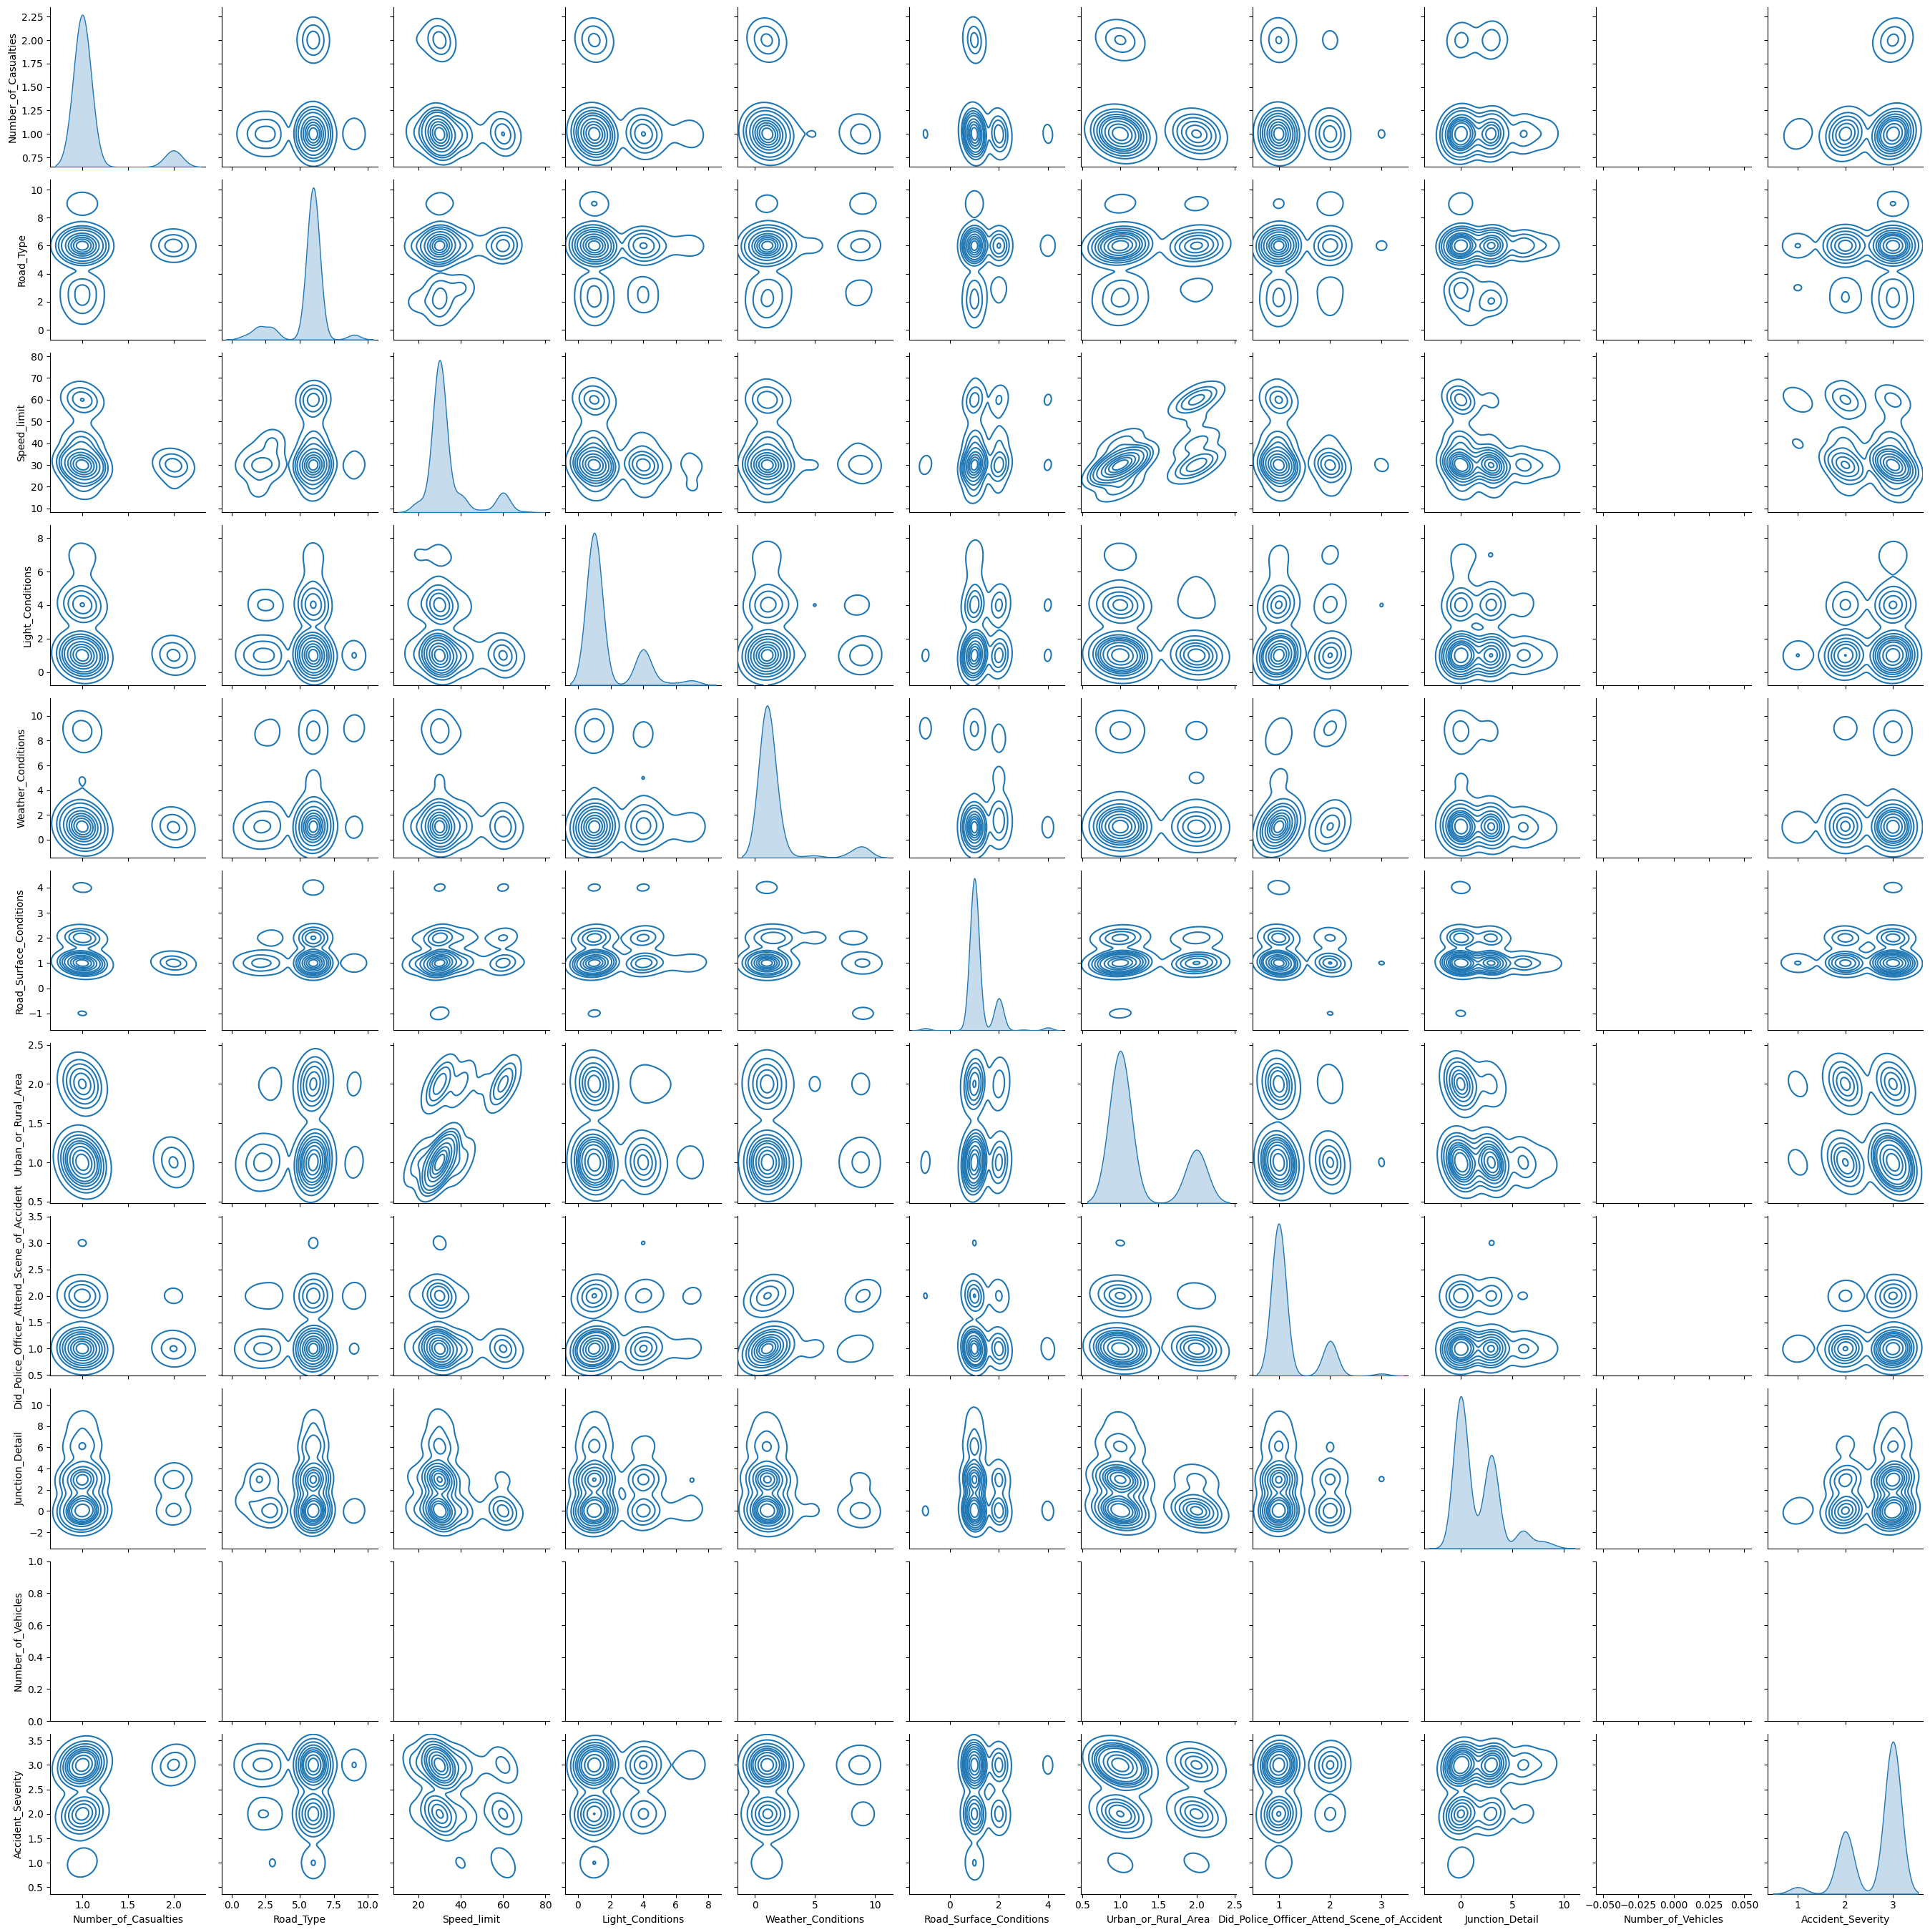

In [34]:
sns.pairplot(data = df_roads.sample(frac=0.05), kind = 'kde')

In [36]:
df_roads['Number_of_Vehicles'].unique()

array([1, 2])

In [ ]:
df_roads.groupby(['Road_Type', 'Number_of_Casualties']).size()

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barh(data=df_roads, x=df_roads["Road_Type"], y=df_roads["Number_of_Casualties"])
plt.title('Road Type vs Number of Casualties')
plt.show()

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(df_roads.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.title('Road Type vs Number of Casualties')
plt.show()